<a href="https://colab.research.google.com/github/sadneurons/DjangoDementiaDashboard/blob/master/CODR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import statements and R magic

In [ ]:
# !pip install pandas
# !pip install statistics
# !pip install matplotlib 
# !pip install numpy
# !pip install jupyter_contrib_nbextensions
# !pip install prettyprint
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib
import nbextensions
import collections 
from pprint import pprint
%load_ext rpy2.ipython
# import artichoke # my own functions for data analysis 
path = '/content/drive/MyDrive/Colab Notebooks/CODR_Data'

# Bespoke functions for analyzing *dataframes*

In [ ]:
def getObjectCols(df):
# for each column of a dataframe
    x = [df[item].dtype.str for item in df.columns] 
    return df.columns[[col == '|O' for col in x]]
# pretty print the levels of "factors" as in R

def lengthUniqueValuesObjectCols(df):
    index = getObjectCols(df)
    output = {item: (len(set(df[item]))) for item in index}
    return output

def lengthUniqueValuesAllCols(df):
    output = {item: (len(set(df[item]))) for item in df.columns}
    return output

def countPercentages(list):
    from collections import Counter
    l = list
    c = Counter(list)
    return {i: round(c[i] / len(l) * 100.0, 2) for i in c}


# Data cleaning

### Demographics

In [ ]:
# read in the demographics file for basic descriptive stats
pdfilepath = path + '/dm.csv'
demographics = pd.read_csv(pdfilepath)

In [ ]:
levels  = (lengthUniqueValuesAllCols(demographics))
pprint(levels)

{'ACTARM': 7163,
 'ACTARMCD': 7163,
 'AGE': 48,
 'AGEU': 1,
 'ARM': 7,
 'ARMCD': 12,
 'COUNTRY': 47,
 'DMDTC': 7163,
 'DMDTC_TS': 7163,
 'DMDY': 7163,
 'DMENDY': 7163,
 'DOMAIN': 2,
 'DTHDTC': 7163,
 'DTHFL': 7163,
 'ETHNIC': 4,
 'INVID': 200,
 'INVNAM': 7163,
 'RACE': 10,
 'RFENDTC': 7163,
 'RFENDTC_TS': 7163,
 'RFSTDTC': 7163,
 'RFSTDTC_TS': 7163,
 'SEX': 2,
 'SITEID': 921,
 'STUDYID': 29,
 'SUBJID': 5397,
 'USUBJID': 7163}


In [ ]:
ethnicities = dict(collections.Counter(demographics.RACE))
print(ethnicities)
for key, value in countPercentages(demographics.RACE).items():
    print(f'{key}:\t\t\t{value}')

{'WHITE': 6555, 'OTHER': 98, 'ASIAN': 309, nan: 7, 'BLACK OR AFRICAN AMERICAN': 175, 'MULTIPLE': 1, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 2, 'AMERICAN INDIAN OR ALASKA NATIVE': 12, 'MUTIPLE': 2, 'UNKNOWN': 2}
WHITE:			91.51
OTHER:			1.37
ASIAN:			4.31
nan:			0.1
BLACK OR AFRICAN AMERICAN:			2.44
MULTIPLE:			0.01
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER:			0.03
AMERICAN INDIAN OR ALASKA NATIVE:			0.17
MUTIPLE:			0.03
UNKNOWN:			0.03


Index(['STUDYID', 'DOMAIN', 'USUBJID', 'SUBJID', 'RFSTDTC', 'RFENDTC',
       'DTHDTC', 'DTHFL', 'SITEID', 'INVID', 'AGE', 'AGEU', 'SEX', 'RACE',
       'ETHNIC', 'ARMCD', 'ARM', 'ACTARMCD', 'ACTARM', 'COUNTRY', 'DMDTC',
       'DMDY', 'DMENDY', 'DMDTC_TS', 'INVNAM', 'RFENDTC_TS', 'RFSTDTC_TS'],
      dtype='object')
{nan, nan, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 999.0}
103 are missing an age entry


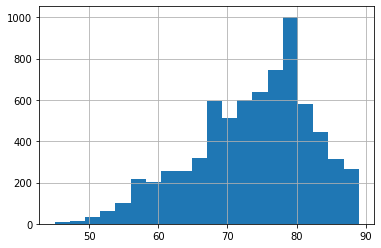

In [ ]:
# Age:
pprint(demographics.columns)
print(set(demographics.AGE))
# drop the nas and the 999
participantsTotal = len(set(demographics.USUBJID))
missingAges = len([item for item in demographics.AGE[(demographics.AGE==999.0) | (np.isnan(demographics.AGE))]])
print(f'{missingAges} are missing an age entry') # number missing Ages
# replace 999 with nan for uniformity
demographics.AGE = demographics.AGE.replace(999.0, None)
pd.plotting.hist_series(demographics.AGE, bins=20)

In [ ]:
medianAgeCODR = stats.median(demographics.AGE)
sdAgeCODR = stats.stdev(demographics.AGE.dropna())
maxAgeCODR , minAgeCODR =  max(demographics.AGE.dropna()), min(demographics.AGE.dropna())
print(f'The median age is {medianAgeCODR} years (sd = {sdAgeCODR:.1f} years) with a range of {minAgeCODR} to {maxAgeCODR} years.')

The median age is 75.0 years (sd = 8.5 years) with a range of 45.0 to 89.0 years.


In [ ]:
sexDict = dict(collections.Counter(demographics.SEX))
women = sexDict['F']
men = sexDict['M']
womenperc = 100*women/participantsTotal
menperc = 100*men/participantsTotal
print(f'There were {women} ({womenperc:.1f}%) women and {men} ({menperc:.1f}%) men.')

There were 4015 (56.1%) women and 3148 (43.9%) men.


### ADAS-Cog data cleaning

In [ ]:
qsfilepath  = path + '/qs.csv'
qs = pd.read_csv(qsfilepath)
set(qs.QSCAT)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,5,10,11,12,14,15,16,17,18,21,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'ACTIVITIES OF DAILY LIVING INVENTORY (ADCS-ADL)',
 'ADAS-COG',
 'ADCS-ADL',
 'ADCS-CGIC',
 'C-SSRS BASELINE',
 'C-SSRS SINCE LAST VISIT',
 'CLINICAL DEMENTIA RATING',
 'DAD',
 'DEMQOL-PROXY',
 'MMSE',
 'NEUROPSYCHIATRIC INVENTORY (NPI) SCORING SUMMARY',
 'NPI',
 'SIB'}

In [ ]:
# take out the ADAS-COG data
adas = qs[qs.QSCAT=="ADAS-COG"]

In [ ]:
set(adas.QSSCAT)

{'COMMANDS',
 'COMMANDS DETAIL',
 'COMMANDS SUMMARY',
 'COMPREHENSION',
 'CONSTRUCTIONAL PRAXIS',
 'CONSTRUCTIONAL PRAXIS DETAIL',
 'CONSTRUCTIONAL PRAXIS SUMMARY',
 'DEGREE OF IMPAIRMENT',
 'DELAYED WORD RECALL',
 'DELAYED WORD RECALL DETAIL',
 'DELAYED WORD RECALL SUMMARY',
 'EXECUTION FUNCTION MAZES',
 'EXECUTIVE FUNCTION MAZE DETAIL',
 'EXECUTIVE FUNCTION MAZE SUMMARY',
 'IDEATIONAL PRAXIS',
 'IDEATIONAL PRAXIS DETAIL',
 'IDEATIONAL PRAXIS SUMMARY',
 'NAMING OBJECTS AND FINGERS',
 'NAMING OBJECTS AND FINGERS DETAIL',
 'NAMING OBJECTS AND FINGERS SUMMARY',
 'NUMBER CANCELLATION',
 'NUMBER CANCELLATION DETAIL',
 'NUMBER CANCELLATION SUMMARY',
 'ORIENTATION',
 'ORIENTATION DETAIL',
 'ORIENTATION SUMMARY',
 'WORD RECALL',
 'WORD RECALL DETAIL',
 'WORD RECALL SUMMARY',
 'WORD RECOGNITION',
 'WORD RECOGNITION DETAIL',
 'WORD RECOGNITION SUMMARY',
 nan}

In [ ]:
# we really only want the data summaries
catlist = [ 'COMMANDS SUMMARY', 'CONSTRUCTIONAL PRAXIS SUMMARY',
          'DEGREE OF IMPAIRMENT',  'DELAYED WORD RECALL SUMMARY', 'EXECUTIVE FUNCTION MAZE SUMMARY',
           'IDEATIONAL PRAXIS SUMMARY', 'NAMING OBJECTS AND FINGERS SUMMARY',
           'NUMBER CANCELLATION SUMMARY',  'ORIENTATION SUMMARY',  'WORD RECALL SUMMARY',
          'WORD RECOGNITION SUMMARY']

In [ ]:
adasum = adas[[item in catlist for item in adas.QSSCAT]]

In [ ]:
set(adasum.QSSCAT)

{'COMMANDS SUMMARY',
 'CONSTRUCTIONAL PRAXIS SUMMARY',
 'DEGREE OF IMPAIRMENT',
 'DELAYED WORD RECALL SUMMARY',
 'EXECUTIVE FUNCTION MAZE SUMMARY',
 'IDEATIONAL PRAXIS SUMMARY',
 'NAMING OBJECTS AND FINGERS SUMMARY',
 'NUMBER CANCELLATION SUMMARY',
 'ORIENTATION SUMMARY',
 'WORD RECALL SUMMARY',
 'WORD RECOGNITION SUMMARY'}

In [ ]:
# Save to csv file for reloading into R for ggplot2
exportpath = path + '/adasum.csv'
adasum.to_csv(exportpath, index=False) # then switch to R
print(exportpath)

/content/drive/MyDrive/Colab Notebooks/CODR_Data/adasum.csv


In [ ]:
%%R
library(dplyr)
library(tidyr)
library(readr)
radasum = read_csv('/content/drive/MyDrive/Colab Notebooks/CODR_Data/adasum.csv')

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



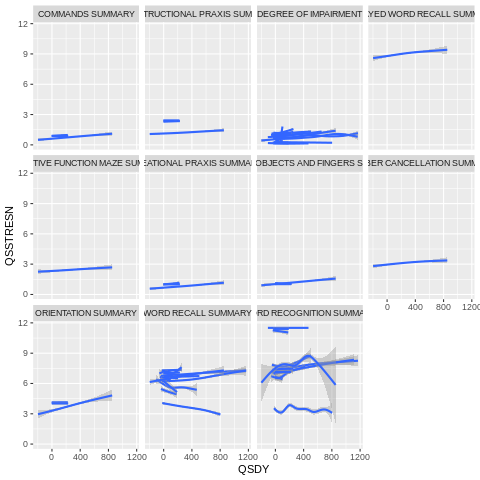

In [ ]:
%%R
library(ggplot2)
ggplot(data=radasum, aes(x=QSDY, y=QSSTRESN, group=radasum$STUDYID)) + geom_smooth() + facet_wrap(~QSSCAT) 

Blend in demographic data from above

In [ ]:
demmerge = demographics[['USUBJID', 'AGE', 'SEX', 'COUNTRY']]
cogdem = adasum.merge(demmerge, how='inner')
#cogdem
demmerge.shape, adasum.shape, cogdem.shape # just checking!

((7163, 4), (263815, 32), (263815, 35))

#### Get blood pressure data

In [ ]:
scpath = path + '/sc.csv'
sc = pd.read_csv(scpath)

In [ ]:
edutainment = sc[sc.SCTEST=='Level of Education Attained']

(1345, 22)

In [ ]:
collections.Counter(edutainment.SCSTRESC)
sc.shape

(1345, 22)

In [ ]:
# Clearly Educational attainment only available for a small subset of people 
# but in those in whom it is available it might be a useful indicator

(1345, 22)

In [ ]:
mhpath = path + '/mh.csv'
mh = pd.read_csv(mhpath)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pprint(mh.columns)
mh.shape
medhx = mh[['USUBJID', 'MHTERM']]
medhx.MHTERM = [str(row).lower() for row in medhx.MHTERM]
medhx.shape
medhxwide = medhx.groupby('USUBJID')['MHTERM'].apply(list).reset_index()
medhxwide.shape

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'MHSEQ', 'MHGRPID', 'MHREFID', 'MHSPID',
       'MHTERM', 'MHMODIFY', 'MHLLT', 'MHDECOD', 'MHHLT', 'MHHLGT', 'MHCAT',
       'MHSCAT', 'MHPRESP', 'MHOCCUR', 'MHSTAT', 'MHREASND', 'MHBODSYS',
       'MHSOC', 'MHLOC', 'MHLAT', 'MHSEV', 'MHPATT', 'MHCONTRT', 'MHTOXGR',
       'VISITNUM', 'VISIT', 'EPOCH', 'MHDTC', 'MHSTDTC', 'MHENDTC', 'MHDY',
       'MHSTDY', 'MHENDY', 'MHDUR', 'MHSTRF', 'MHENRF', 'MHEVLINT', 'MHSTRTPT',
       'MHSTTPT', 'MHENRTPT', 'MHENTPT'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(7147, 2)

In [ ]:
def findTermIndex(term, df, series): # looks for a term in each line
    outlist=[]
    for number, row in enumerate(df[series]):
        outlist.append(any([term in item for item in df[series][number]]))
    return(outlist)

def findTermListIndex(termlist, df, series): # looks for *each* term in each line
    outlist=[]
    for term in termlist:
        outlist.append(findTermIndex(term, df, series))
    outlist = list(zip(*outlist))
    return [any(item) for item in outlist]

def searchToColumn(colname, termlist,df ,series): # appends found terms to the dataframe
    df[colname] = findTermListIndex(termlist, df, series)
    return collections.Counter(df[colname]) # side effects!


Counter({False: 4422, True: 2725})

In [ ]:
# iterate over this dictionary to create seperate disease columns:
# dict = {'columnName1' : ['searchTermA', 'searchTermB']  etc.}

termdict = {'STROKE': ['stroke', 'transient ischem', 'transient ischaem', 'tia', 't.i.a', 'cva', 'c.v.a'],
            'HYPERTENSION': ['hyperten', 'blood press', 'htn'],
            'COPD': ['copd', 'chronic obstructive lung', 'emphysema']}

for key, value in termdict.items():
    searchToColumn(key, value, medhxwide, 'MHTERM')

medhxwide


,USUBJID,MHTERM,STROKE,HYPERTENSION,COPD
0,1000-13199-33002,"[alzheimer's disease, high cholesterol, patien...",False,False,False
1,1000-13887-32708,"[allergic rhinitis, allergic to cats, allergic...",False,True,False
2,1000-13887-32709,"[alzheimer's disease, anxiety-stable, hard of ...",False,False,False
3,1000-13887-32712,"[alzheimer's disease, alzheimer's disease, dep...",False,False,False
4,1000-13981-33101,"[alzheimer's disease, asthma, benign breast ca...",False,True,False
...,...,...,...,...,...
7142,STUDY01-927-S79062,"[ecg - complete right bundle branch block, ins...",False,False,False
7143,STUDY01-927-S79087,"[allergic to penicillin macrodentin, ferodanti...",False,False,False
7144,STUDY01-927-S79092,"[fungal infection left great toe, mild cogniti...",False,False,False
7145,STUDY01-928-S79026,"[diverticulitis, elevated cholesterol, fortnig...",False,True,False


In [ ]:
# get UNIQUE names, might be cleaner


Index(['STUDYID', 'DOMAIN', 'USUBJID', 'MHSEQ', 'MHGRPID', 'MHREFID', 'MHSPID',
       'MHTERM', 'MHMODIFY', 'MHLLT', 'MHDECOD', 'MHHLT', 'MHHLGT', 'MHCAT',
       'MHSCAT', 'MHPRESP', 'MHOCCUR', 'MHSTAT', 'MHREASND', 'MHBODSYS',
       'MHSOC', 'MHLOC', 'MHLAT', 'MHSEV', 'MHPATT', 'MHCONTRT', 'MHTOXGR',
       'VISITNUM', 'VISIT', 'EPOCH', 'MHDTC', 'MHSTDTC', 'MHENDTC', 'MHDY',
       'MHSTDY', 'MHENDY', 'MHDUR', 'MHSTRF', 'MHENRF', 'MHEVLINT', 'MHSTRTPT',
       'MHSTTPT', 'MHENRTPT', 'MHENTPT'],
      dtype='object')


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
94223   NaN
94224   NaN
94225   NaN
94226   NaN
94227   NaN
Name: MHDUR, Length: 94228, dtype: float64

In [ ]:
vspath = path + '/vs.csv'
vs = pd.read_csv(vspath)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,9,11,12,14,17,19,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
vs.shape

(245378, 35)